# LASSO and RIDGE regularization 

Starting from a normal linear regression the idea is to add a new term to limit the slope (partial) in the equation.
The idea is to limit the influence of some of the features in the label data.

The normal linear regression is:
$$y = Ax + b$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets

session = tf.Session()
iris = datasets.load_iris()

%config Completer.use_jedi = False

In [2]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [72]:
batch_size = 50
learning_rate = 0.0008
x_data = tf.placeholder(shape = [None, 1], dtype= tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

## Heavy side function

We use this special function to limit the slope of the regression. In this case we are aiming for slope not greater than 0.9 (Lasso hyperparameter)

$$HeavySide = \frac{1}{1 + e^{-100(A - Lasso)}}$$

The Lasso regularization consists in the Heavyside function multiplied by a parameter C. Finally the loss function is:

$$ \sum\frac{(y_r - y_p)²}{n} \frac{C}{1 + e^{-100(A - Lasso)}}$$

In [78]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param) ) ) ) )
regularization_params = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), regularization_params)

In [79]:
init = tf.global_variables_initializer()
session.run(init)     #Variables initialization

In [80]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_opt.minimize(loss)

### Model training

In [81]:
loss_vect = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x,
                                         y_target: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x,
                                               y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%100 == 0:
        print('Step #'+str(i+1)+
              'A = '+str(session.run(A))+
              'b = '+str(session.run(b))+
              ' Loss = '+str(temp_loss))

Step #100A = [[0.82895064]]b = [[1.7486157]] Loss = [[10.155561]]
Step #200A = [[0.8256071]]b = [[2.208633]] Loss = [[6.816853]]
Step #300A = [[0.82439774]]b = [[2.6000693]] Loss = [[5.410045]]
Step #400A = [[0.82386816]]b = [[2.933651]] Loss = [[3.698141]]
Step #500A = [[0.8214554]]b = [[3.2172647]] Loss = [[2.7260814]]
Step #600A = [[0.8200888]]b = [[3.4587846]] Loss = [[2.080694]]
Step #700A = [[0.81973803]]b = [[3.6667874]] Loss = [[2.0377605]]
Step #800A = [[0.81746006]]b = [[3.8441985]] Loss = [[1.1476073]]
Step #900A = [[0.8157986]]b = [[3.9943504]] Loss = [[0.98734504]]
Step #1000A = [[0.814105]]b = [[4.123106]] Loss = [[0.65885305]]
Step #1100A = [[0.8130227]]b = [[4.233333]] Loss = [[0.8608094]]
Step #1200A = [[0.81121534]]b = [[4.3279376]] Loss = [[0.57468617]]
Step #1300A = [[0.80957663]]b = [[4.4081583]] Loss = [[0.4827073]]
Step #1400A = [[0.80890054]]b = [[4.476888]] Loss = [[0.49703753]]
Step #1500A = [[0.80756396]]b = [[4.5361943]] Loss = [[0.26903012]]
Step #1600A = [

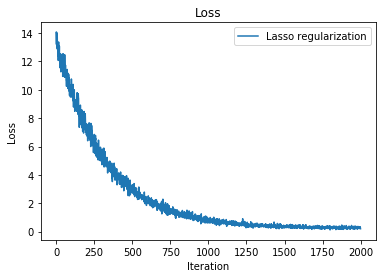

In [82]:
plt.plot(np.array(loss_vect).reshape(-1,1), label = 'Lasso regularization')
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

Note = Learning rate hyperparameter is very sensitive. If the loss function doesn't converge try with a smaller value!

### Regression equation

In [40]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print('Regression equation using Lasso regularization = ', str(np.round(slope, 3)) + 'x + '+ str(np.round(intercept,3)))

Regression equation using Lasso regularization =  0.802x + 4.719


### Regression model fitting

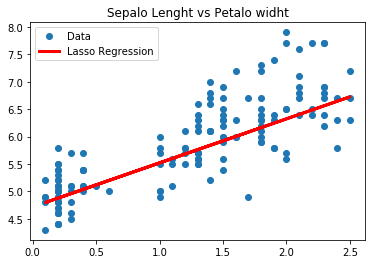

In [41]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

plt.plot(x_vals, y_vals, 'o', label = 'Data')
plt.plot(x_vals, best_fit, 'r-', label = 'Lasso Regression', linewidth = 3)
plt.legend(loc = 'upper left')
plt.title('Sepalo Lenght vs Petalo widht')
plt.show()


# Ridge regression

$$\sum\frac{(y_r-y_p)²}{n} + ridge_p\cdot A^2$$

In [73]:
ridge_param = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), tf.multiply(ridge_param, ridge_loss)), 0)

In [74]:
init = tf.global_variables_initializer()
session.run(init)     #Variables initialization

In [75]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_opt.minimize(loss)

### Model training

In [76]:
loss_vect_ridge = []
for i in range(3000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x,
                                         y_target: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x,
                                               y_target: rand_y})
    loss_vect_ridge.append(temp_loss)
    if(i+1)%100 == 0:
        print('Step #'+str(i+1)+
              'A = '+str(session.run(A))+
              'b = '+str(session.run(b))+
              ' Loss = '+str(temp_loss))

Step #100A = [[1.4983251]]b = [[-0.73353803]] Loss = [25.909557]
Step #200A = [[1.9388657]]b = [[-0.07112502]] Loss = [18.16264]
Step #300A = [[2.1215627]]b = [[0.4381962]] Loss = [14.552784]
Step #400A = [[2.1636333]]b = [[0.8597586]] Loss = [11.845059]
Step #500A = [[2.1300683]]b = [[1.2160571]] Loss = [10.701323]
Step #600A = [[2.060281]]b = [[1.528044]] Loss = [8.270433]
Step #700A = [[1.9701525]]b = [[1.8125598]] Loss = [7.4599113]
Step #800A = [[1.8743478]]b = [[2.067885]] Loss = [6.859624]
Step #900A = [[1.7788733]]b = [[2.305231]] Loss = [6.451536]
Step #1000A = [[1.6795113]]b = [[2.5197816]] Loss = [5.0517807]
Step #1100A = [[1.5904672]]b = [[2.7223628]] Loss = [4.494628]
Step #1200A = [[1.5021846]]b = [[2.9102082]] Loss = [4.554845]
Step #1300A = [[1.4236724]]b = [[3.0863204]] Loss = [3.0884593]
Step #1400A = [[1.350415]]b = [[3.247138]] Loss = [2.9794931]
Step #1500A = [[1.2800272]]b = [[3.3963158]] Loss = [2.5683923]
Step #1600A = [[1.214224]]b = [[3.537555]] Loss = [2.5390

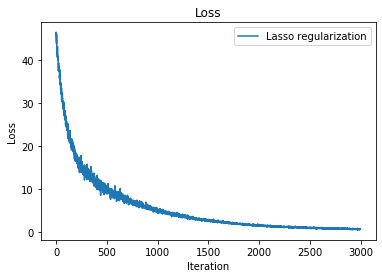

In [77]:
plt.plot(np.array(loss_vect_ridge).reshape(-1,1), label = 'Lasso regularization')
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Regression equation

In [69]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print('Regression equation using Lasso regularization = ', str(np.round(slope, 3)) + 'x + '+ str(np.round(intercept,3)))

Regression equation using Lasso regularization =  0.653x + 4.755


### Regression model fitting

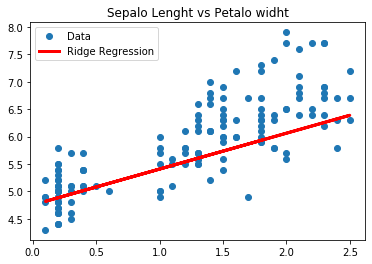

In [71]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

plt.plot(x_vals, y_vals, 'o', label = 'Data')
plt.plot(x_vals, best_fit, 'r-', label = 'Ridge Regression', linewidth = 3)
plt.legend(loc = 'upper left')
plt.title('Sepalo Lenght vs Petalo widht')
plt.show()